<a href="https://colab.research.google.com/github/vishwa83/Data-Science-Projects/blob/master/viswanatha_krishnamurthy_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [4]:
root_path = '/content/drive/MyDrive/Upgrad_Assignments'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/Upgrad_Assignments/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/Upgrad_Assignments/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', label_mode='int',class_names=None, color_mode='rgb', batch_size=32, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset="training",
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

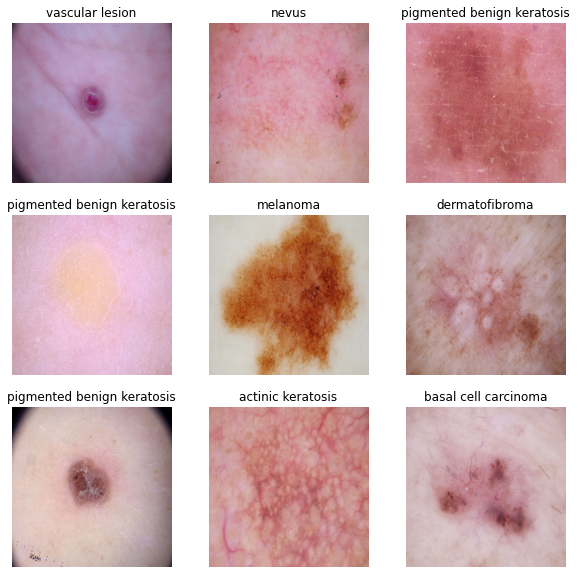

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 75ms/step - loss: 1.9910 - accuracy: 0.2980 - val_loss: 1.6855 - val_accuracy: 0.4251
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6147 - accuracy: 0.4269 - val_loss: 1.4890 - val_accuracy: 0.5078
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4047 - accuracy: 0.5151 - val_loss: 1.3441 - val_accuracy: 0.5369
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3203 - accuracy: 0.5357 - val_loss: 1.3642 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2553 - accuracy: 0.5547 - val_loss: 1.3883 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1404 - accuracy: 0.6004 - val_loss: 1.3037 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1045 - accuracy: 0.6016 - val_loss: 1.4093 - val_accuracy: 0.5436
Epoch 8/20
5

### Visualizing training results

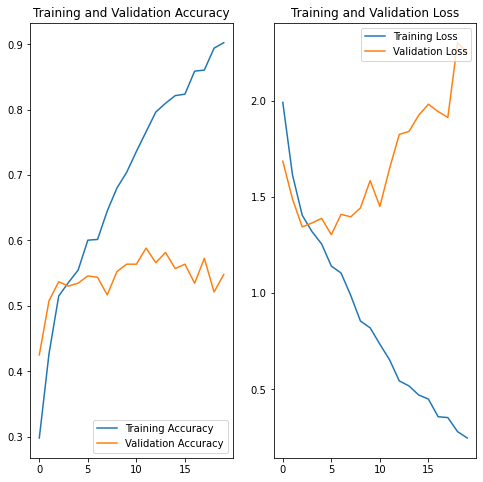

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Model is classic case of overfitting. Significant drop (close to 40%) in the accuracy between validation set as against the training set is a feature indicating overfit model.


### Write your findings here

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

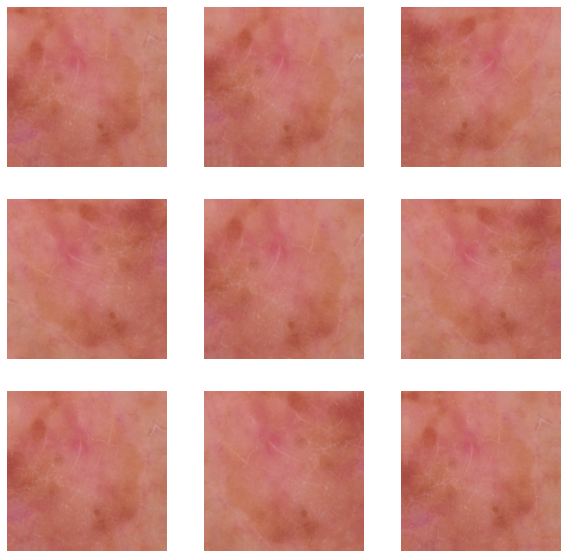

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [21]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 15
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
56/56 [==============================] - 3s 27ms/step - loss: 2.1372 - accuracy: 0.2310 - val_loss: 2.0048 - val_accuracy: 0.2327
Epoch 2/15
56/56 [==============================] - 1s 23ms/step - loss: 1.7731 - accuracy: 0.3438 - val_loss: 1.6398 - val_accuracy: 0.4407
Epoch 3/15
56/56 [==============================] - 1s 23ms/step - loss: 1.5655 - accuracy: 0.4408 - val_loss: 1.5034 - val_accuracy: 0.4944
Epoch 4/15
56/56 [==============================] - 1s 23ms/step - loss: 1.4600 - accuracy: 0.4810 - val_loss: 1.5330 - val_accuracy: 0.4430
Epoch 5/15
56/56 [==============================] - 1s 23ms/step - loss: 1.3689 - accuracy: 0.5184 - val_loss: 1.3547 - val_accuracy: 0.5459
Epoch 6/15
56/56 [==============================] - 1s 23ms/step - loss: 1.3243 - accuracy: 0.5335 - val_loss: 1.3815 - val_accuracy: 0.5347
Epoch 7/15
56/56 [==============================] - 1s 23ms/step - loss: 1.3016 - accuracy: 0.5435 - val_loss: 1.3843 - val_accuracy: 0.5257
Epoch 8/15
56

### Visualizing the results

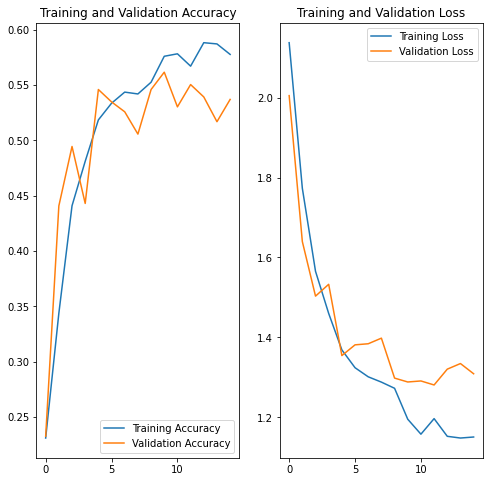

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Model seems to be behaving better compared against the previous model. Its not an ideal model to consider as pattern is not competely in sync with training set. However, performance in encouraging and with hope to futher refine and fine tune the model for enhanced performance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
distribution = []
from collections import Counter
for images, labels in train_ds:
    distribution.append(class_names[labels[i]])

Class_distribution = Counter(distribution)
Class_distribution

Counter({'actinic keratosis': 2,
         'basal cell carcinoma': 7,
         'dermatofibroma': 2,
         'melanoma': 14,
         'nevus': 6,
         'pigmented benign keratosis': 15,
         'seborrheic keratosis': 4,
         'squamous cell carcinoma': 4,
         'vascular lesion': 2})

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has the least samples amongst the classess
#### - Which classes dominate the data in terms proportionate number of samples? squamous cell carcinoma and actinic keratosis are the dominant classes in terms of samples made available to us


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset="/content/drive/MyDrive/Upgrad_Assignments/Train/"
names = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']

list_of_path = []
for i in names:
  list_of_path.append(path_to_training_dataset + i)

import Augmentor

for i in names:
  p = Augmentor.Pipeline("/content/drive/MyDrive/Upgrad_Assignments/Train/" + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0EFA479150>:   0%|          | 1/500 [00:00<01:02,  7.97 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0FA9F02990>: 100%|██████████| 500/500 [00:18<00:00, 27.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F5E8325D0>: 100%|██████████| 500/500 [00:19<00:00, 26.08 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F500A5710>: 100%|██████████| 500/500 [00:19<00:00, 25.99 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0EFA54FCD0>:   0%|          | 1/500 [00:00<01:37,  5.09 Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F5E7C9690>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F0EFA579FD0>: 100%|██████████| 500/500 [01:24<00:00,  5.95 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F5E9184D0>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0EFA54FED0>: 100%|██████████| 500/500 [00:40<00:00, 12.44 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0FA9F00310>: 100%|██████████| 500/500 [00:18<00:00, 27.05 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad_Assignments/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F01AFE3D0>: 100%|██████████| 500/500 [00:19<00:00, 25.55 Samples/s]


In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

7000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
from glob import glob
import os
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_580b6ebe-d212-43da-8b27-447954d5bab0.jpg',
 '/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027254.jpg_00f4272d-426f-49d1-a73b-fccd8d19090a.jpg',
 '/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030133.jpg_a1e5face-97ca-4169-9d8e-cbc39bf4a93f.jpg',
 '/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_191616c8-fe51-4a91-b468-5da0b4d1f278.jpg',
 '/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026194.jpg_4bf58695-349f-4cc6-a375-6fa1d54948ae.jpg',
 '/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031292.jpg_bc76c8cf-177a-488c-b5ea-8e9e4c3b0c87.jpg',
 '/content/drive/MyDrive/Upg

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
path_list_old = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_old = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_old, lesion_list_old))
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
1,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
2,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
3,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
4,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
...,...,...
2234,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
2235,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
2236,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train
2237,/content/drive/MyDrive/Upgrad_Assignments/Trai...,Train


In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [39]:
new_df['Label'].value_counts()

Train    4478
Name: Label, dtype: int64

In [37]:
import pandas as pd
pd.set_option("max_colwidth", 200)
new_df.head()


,Path,Label
0,/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/ISIC_0030463.jpg,Train
1,/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/ISIC_0026729.jpg,Train
2,/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/ISIC_0028517.jpg,Train
3,/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/ISIC_0030036.jpg,Train
4,/content/drive/MyDrive/Upgrad_Assignments/Train/actinic keratosis/ISIC_0029025.jpg,Train


In [40]:
new_df.tail()

,Path,Label
2234,/content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/ISIC_0028052.jpg,Train
2235,/content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/ISIC_0028404.jpg,Train
2236,/content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/ISIC_0028094.jpg,Train
2237,/content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/ISIC_0028640.jpg,Train
2238,/content/drive/MyDrive/Upgrad_Assignments/Train/pigmented benign keratosis/ISIC_0028555.jpg,Train


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
data_dir_train= "/content/drive/MyDrive/Upgrad_Assignments/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split = 0.2,subset = "training",image_size=(img_height, img_width),batch_size=batch_size)

Found 9239 files belonging to 9 classes.
Using 7392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split = 0.2,subset = "validation",image_size=(img_height, img_width),batch_size=batch_size)

Found 9239 files belonging to 9 classes.
Using 1847 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
## your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

#### **Todo:**  Train your model

In [47]:
epochs = 30
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
231/231 [==============================] - 42s 176ms/step - loss: 2.1651 - accuracy: 0.1541 - val_loss: 2.1521 - val_accuracy: 0.1581
Epoch 2/30
231/231 [==============================] - 41s 173ms/step - loss: 2.1525 - accuracy: 0.1550 - val_loss: 2.1471 - val_accuracy: 0.1581
Epoch 3/30
231/231 [==============================] - 41s 173ms/step - loss: 2.1502 - accuracy: 0.1550 - val_loss: 2.1464 - val_accuracy: 0.1581
Epoch 4/30
231/231 [==============================] - 41s 172ms/step - loss: 2.1498 - accuracy: 0.1550 - val_loss: 2.1460 - val_accuracy: 0.1581
Epoch 5/30
231/231 [==============================] - 41s 172ms/step - loss: 2.1497 - accuracy: 0.1550 - val_loss: 2.1460 - val_accuracy: 0.1581
Epoch 6/30
231/231 [==============================] - 41s 173ms/step - loss: 2.1497 - accuracy: 0.1550 - val_loss: 2.1459 - val_accuracy: 0.1581
Epoch 7/30
231/231 [==============================] - 41s 173ms/step - loss: 2.1497 - accuracy: 0.1550 - val_loss: 2.1461 - val_ac

#### **Todo:**  Visualize the model results

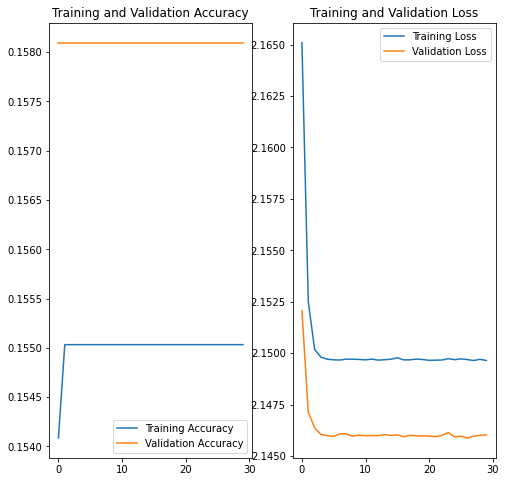

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
Aforementioned visuals of accuracy and loss are pretty puzzling, especially the accuracy bit. 
Validation accuracy does seem to higher than training, however am certain that this is not the best of the results we could acheive.
Class re-balance did help tune the model, however there is plenty more that could be done to generate a sensible model